# RL and Advanced DL: Домашнее задание 2

Анна Бекетова MADE ML-32

In [1]:
import gym
import numpy as np
import random
import torch

from tic_tac_toe import TicTacToe
from qlearning_utils import RandomAgent, TabularQAgent, train_q_agents, show_game

SEED = 17

np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED);

## Little demo on TicTacToe environment

In [2]:
env = TicTacToe(n_rows=3, n_cols=3, n_win=3)
env.reset()

state, empty_cells, turn = env.getState()

print("State:", state)
print("0 - cell with 0\n", "1 - available cell\n", "2 - cell with X\n")
print("Empty cells coordinates", empty_cells, "\n")
print("Turn:", turn)
print("1 - crosses X, -1 - naughts 0")

State: 111111111
0 - cell with 0
 1 - available cell
 2 - cell with X

Empty cells coordinates [[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]] 

Turn: 1
1 - crosses X, -1 - naughts 0


In [3]:
# 3x3 field

env = TicTacToe(n_rows=3, n_cols=3, n_win=3)
random_agent = RandomAgent()

show_game(env, random_agent)

-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
|   |   | x | 
-------------
State: 111111112, turn: -1, reward: 0
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
| o |   | x | 
-------------
State: 111111012, turn: 1, reward: 0
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
| o | x | x | 
-------------
State: 111111022, turn: -1, reward: 0
-------------
|   |   | o | 
-------------
|   |   |   | 
-------------
| o | x | x | 
-------------
State: 110111022, turn: 1, reward: 0
-------------
|   |   | o | 
-------------
| x |   |   | 
-------------
| o | x | x | 
-------------
State: 110211022, turn: -1, reward: 0
-------------
|   |   | o | 
-------------
| x | o |   | 
-------------
| o | x | x | 
-------------
State: 110201022, turn: 1, reward: -1
Naughts O won


In [4]:
# 4x4 field

env = TicTacToe(n_rows=4, n_cols=4, n_win=4)
random_agent = RandomAgent()

show_game(env, random_agent)

-----------------
|   |   |   |   | 
-----------------
|   | x |   |   | 
-----------------
|   |   |   |   | 
-----------------
|   |   |   |   | 
-----------------
State: 1111121111111111, turn: -1, reward: 0
-----------------
|   |   |   |   | 
-----------------
|   | x |   |   | 
-----------------
|   |   |   |   | 
-----------------
|   | o |   |   | 
-----------------
State: 1111121111111011, turn: 1, reward: 0
-----------------
|   |   |   |   | 
-----------------
|   | x |   |   | 
-----------------
|   |   |   |   | 
-----------------
| x | o |   |   | 
-----------------
State: 1111121111112011, turn: -1, reward: 0
-----------------
|   |   |   |   | 
-----------------
|   | x |   |   | 
-----------------
|   |   |   |   | 
-----------------
| x | o | o |   | 
-----------------
State: 1111121111112001, turn: 1, reward: 0
-----------------
|   |   |   |   | 
-----------------
|   | x |   |   | 
-----------------
|   | x |   |   | 
-----------------
| x | o | o |   | 
----------

## Часть первая: крестики-нолики при помощи Q-обучения
В коде, прилагающемся к последней лекции про обучение с подкреплением, реализован
Environment для крестиков-ноликов, в котором можно при инициализации указывать
разные размеры доски и условия победы, а также функции для рисования, в том числе с
указанием оценки различных действий. С этим окружением все задания и связаны.
1. Реализуйте обычное (табличное) Q-обучение. Обучите стратегии крестиков и
ноликов для доски 3х3.
2. Попробуйте обучить стратегии крестиков и ноликов для доски 4х4 и/или 5х5.

### 3x3 field Q learning agents

100%|██████████| 300/300 [03:56<00:00,  1.27it/s]


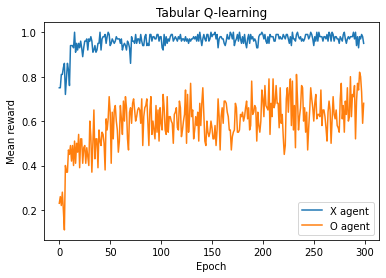

X mean reward last 10 epochs: 0.9612068965517241
O mean reward last 10 epochs: 0.5932068965517241


In [5]:
env = TicTacToe(n_rows=3, n_cols=3, n_win=3)
state, _, _ = env.getState()

lr = 0.01
gamma = 0.9
eps = 0.2

x_agent = TabularQAgent(len(state), lr, gamma, eps, side='x')
o_agent = TabularQAgent(len(state), lr, gamma, eps, side='o')

x_agent, o_agent = train_q_agents(env, x_agent, o_agent)

### 4x4 field Q learning agents, 3 in row

100%|██████████| 300/300 [06:07<00:00,  1.23s/it]


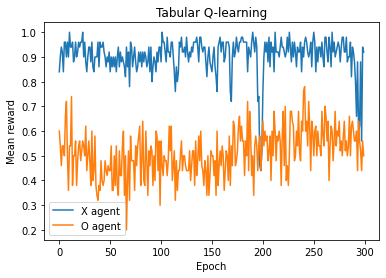

X mean reward last 10 epochs: 0.9102758620689656
O mean reward last 10 epochs: 0.5111034482758621


In [6]:
env = TicTacToe(n_rows=4, n_cols=4, n_win=3)
state, _, _ = env.getState()

lr = 0.01
gamma = 0.5
eps = 0.1

x_agent = TabularQAgent(len(state), lr, gamma, eps, side='x')
o_agent = TabularQAgent(len(state), lr, gamma, eps, side='o')

x_agent, o_agent = train_q_agents(env, x_agent, o_agent)

### 4x4 field Q learning agents, 4 in row

100%|██████████| 1000/1000 [31:11<00:00,  1.87s/it]


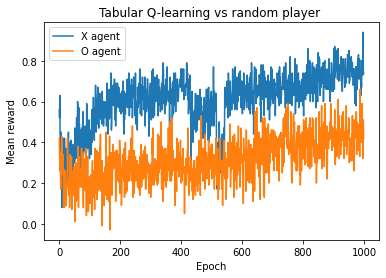

X mean reward last 10 epochs: 0.6096565656565656
O mean reward last 10 epochs: 0.31357575757575756


In [7]:
env = TicTacToe(n_rows=4, n_cols=4, n_win=4)
state, _, _ = env.getState()

lr = 0.01
gamma = 0.3
eps = 0.3

x_agent = TabularQAgent(len(state), lr, gamma, eps, side='x')
o_agent = TabularQAgent(len(state), lr, gamma, eps, side='o')

x_agent, o_agent = train_q_agents(env, x_agent, o_agent, 
                                  n_epochs=1000, n_episodes_train=1000, 
                                  n_episodes_evaluate=100)

Qlearning agents learns good and fast on 3x3 field. 

For 4x4 field there is progress on the graph. It seems like if I train Q learning agents for 4x4 fiels longer they will perform better. Agents need more episodes to develop good strategy because there are not 9 cells (and 3 * 9=27 states) but 16 (and 3 * 16=48 states) and many more cells to fill are available from states. 

I chose hyperparameters running gridsearch and only left the best values I've found.

## Часть вторая: добавим нейронных сетей

Реализуйте нейронную сеть для метода DQN на доске для крестиков-ноликов. Не буду
ограничивать фантазию, но кажется, что свёртки 3х3 здесь должны неплохо работать (в
том числе обобщаться на доски размера побольше).

3. Реализуйте DQN с нейронной сетью, обучите стратегии крестиков и ноликов.
Замечание: скорее всего, experience replay потребуется сразу же.
4. Реализуйте Double DQN и/или Dueling DQN.

In DQN I used convolutions 3x3 for better performance. So the *state* was transformed into 2D array.

In [1]:
import gym
import numpy as np
import random
import torch

from tic_tac_toe import TicTacToe
from dqn_utils import train_dqn_agents, DQNAgent, DQNet, DuelingDQNet, DoubleDQNAgent

SEED = 17

np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED);

### 3x3 field DQN

Training on device: cuda
Training on device: cuda


100%|██████████| 100/100 [04:40<00:00,  2.80s/it]


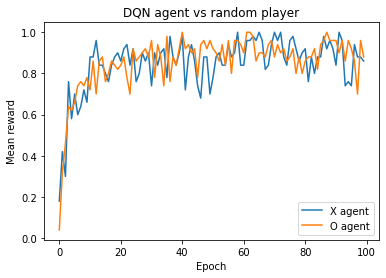

X mean reward last 10 epochs: 0.8448888888888888
O mean reward last 10 epochs: 0.8522222222222221


In [2]:
game_size = 3

env = TicTacToe(n_rows=game_size, n_cols=game_size, n_win=game_size)
state, _, _ = env.getState()

action_size = len(state)
lr = 1e-4
gamma = .8
eps = .3

x_agent = DQNAgent(DQNet, game_size, action_size, lr, gamma, eps, side='x')
o_agent = DQNAgent(DQNet, game_size, action_size, lr, gamma, eps, side='o')

x_agent, o_agent = train_dqn_agents(env, x_agent, o_agent, 
                                    plot_rewards=True,
                                    n_epochs=100, n_episodes_train=500, 
                                    n_episodes_evaluate=50)

### 4x4 field DQN

Training on device: cuda
Training on device: cuda


100%|██████████| 100/100 [06:06<00:00,  3.66s/it]


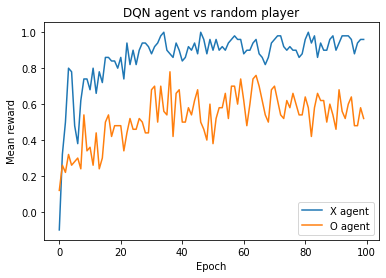

X mean reward last 10 epochs: 0.8573333333333333
O mean reward last 10 epochs: 0.5222222222222223


In [5]:
game_size = 4

env = TicTacToe(n_rows=game_size, n_cols=game_size, n_win=game_size)
state, _, _ = env.getState()

action_size = len(state)
lr = 1e-4
gamma = .3
eps = .3
hidden_size = 256

x_agent = DQNAgent(DQNet, game_size, action_size, 
                   lr, gamma, eps, side='x',
                   inner_size=hidden_size)
o_agent = DQNAgent(DQNet, game_size, action_size, 
                   lr, gamma, eps, side='o',
                   inner_size=hidden_size)

x_agent, o_agent = train_dqn_agents(env, x_agent, o_agent, 
                                    plot_rewards=True,
                                    n_epochs=100, n_episodes_train=500, 
                                    n_episodes_evaluate=50)

### 3x3 field, DuelingDQN

Training on device: cuda
Training on device: cuda


100%|██████████| 100/100 [05:22<00:00,  3.23s/it]


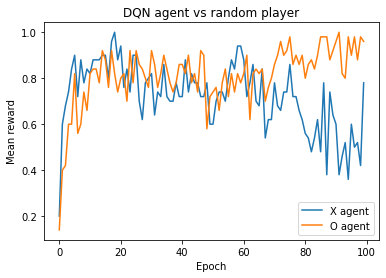

X mean reward last 10 epochs: 0.7451111111111112
O mean reward last 10 epochs: 0.8000000000000002


In [4]:
game_size = 3

env = TicTacToe(n_rows=game_size, n_cols=game_size, n_win=game_size)
state, _, _ = env.getState()

action_size = len(state)
lr = 1e-4
gamma = .8
eps = .3

x_agent = DQNAgent(DuelingDQNet, game_size, action_size, lr, gamma, eps, side='x')
o_agent = DQNAgent(DuelingDQNet, game_size, action_size, lr, gamma, eps, side='o')

x_agent, o_agent = train_dqn_agents(env, x_agent, o_agent, 
                                    plot_rewards=True,
                                    n_epochs=100, n_episodes_train=500, 
                                    n_episodes_evaluate=50)

### 4x4 field DuelingDQN

Training on device: cuda
Training on device: cuda


100%|██████████| 100/100 [06:56<00:00,  4.17s/it]


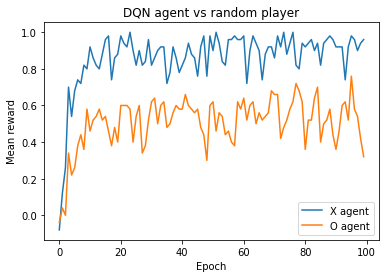

X mean reward last 10 epochs: 0.8553333333333332
O mean reward last 10 epochs: 0.5071111111111111


In [5]:
game_size = 4

env = TicTacToe(n_rows=game_size, n_cols=game_size, n_win=game_size)
state, _, _ = env.getState()

action_size = len(state)
lr = 0.001
gamma = .3
eps = .3
hidden_size = 256

x_agent = DQNAgent(DuelingDQNet, game_size, action_size, 
                   lr, gamma, eps, side='x',
                   inner_size=hidden_size)
o_agent = DQNAgent(DuelingDQNet, game_size, action_size, 
                   lr, gamma, eps, side='o',
                   inner_size=hidden_size)

x_agent, o_agent = train_dqn_agents(env, x_agent, o_agent, 
                                    plot_rewards=True,
                                    n_epochs=100, n_episodes_train=500, 
                                    n_episodes_evaluate=50)

### 3x3 DoubleDQN

Training on device: cuda
Training on device: cuda


100%|██████████| 100/100 [04:33<00:00,  2.73s/it]


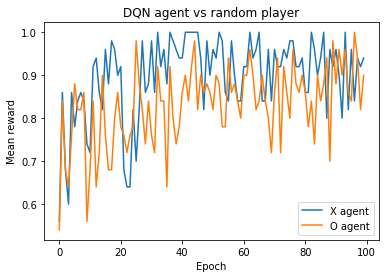

X mean reward last 10 epochs: 0.8951111111111112
O mean reward last 10 epochs: 0.8224444444444445


In [2]:
game_size = 3

env = TicTacToe(n_rows=game_size, n_cols=game_size, n_win=game_size)
state, _, _ = env.getState()

action_size = len(state)
lr = 1e-4
gamma = .8
eps = .3

x_agent = DoubleDQNAgent(DQNet, game_size, action_size, lr, gamma, eps, side='x')
o_agent = DoubleDQNAgent(DQNet, game_size, action_size, lr, gamma, eps, side='o')

x_agent, o_agent = train_dqn_agents(env, x_agent, o_agent, 
                                    plot_rewards=True,
                                    n_epochs=100, n_episodes_train=500, 
                                    n_episodes_evaluate=50)

### 4x4 DoubleDQN

Training on device: cuda
Training on device: cuda


100%|██████████| 100/100 [07:01<00:00,  4.22s/it]


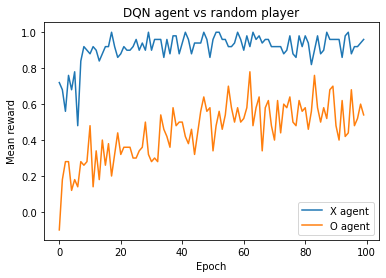

X mean reward last 10 epochs: 0.9104444444444444
O mean reward last 10 epochs: 0.4424444444444445


In [4]:
game_size = 4

env = TicTacToe(n_rows=game_size, n_cols=game_size, n_win=game_size)
state, _, _ = env.getState()

action_size = len(state)
lr = 1e-4
gamma = .3
eps = .3
hidden_size = 256

x_agent = DoubleDQNAgent(DuelingDQNet, game_size, action_size, 
                   lr, gamma, eps, side='x',
                   inner_size=hidden_size)
o_agent = DoubleDQNAgent(DuelingDQNet, game_size, action_size, 
                   lr, gamma, eps, side='o',
                   inner_size=hidden_size)

x_agent, o_agent = train_dqn_agents(env, x_agent, o_agent, 
                                    plot_rewards=True,
                                    n_epochs=100, n_episodes_train=500, 
                                    n_episodes_evaluate=50)

I've chosen lr, gamma and epsilon based on gridsearch. It's interesting that for different models of DQN there were the same best hyperprameters for each field (3x3, 4x4). 

So for field 3x3 I have: lr = 1e-4, gamma = 0.8, eps = 0.3and for 4x4 they are: lr = 1e-4, gamma = 0.3, eps = 0.3. Lower gamma in 4x4 case showes that longer moves history is helpful for learning.

On graphs it is seen that results are quite comparable for all three DQN's (DQN, DuellingDQN and DoubleDQN). On the field 3x3 both crosses and naughts play good, whereas on field 4x4 crosses tend to learn better and therefore play much better. DQN models learns faster than simple Q-learning and have better results.

## Часть третья: расширим и углубим поиск
Крестики-нолики -- это, конечно, далеко не го, и обычный альфа-бета поиск с отсечением
здесь наверняка может работать идеально вплоть до довольно больших досок. Однако мы
всё-таки для этого учебного задания будем реализовывать более практически
релевантный метод MCTS -- заодно фактически получится и упражнение на многоруких
бандитов.
5. Реализуйте rollouts со случайной стратегией и (опционально) rollouts с неслучайной,
но простой стратегией (например, основанной на дополнении нескольких паттернов
или на Q-функции, которая у вас получилась в первом пункте).
6. Реализуйте MCTS-поиск с этими rollouts для крестиков-ноликов на досках разного
размера, сравните полученные стратегии между собой и со стратегиями,
обученными в первых двух частях.

In [1]:
import gym
import numpy as np
import random
import tqdm
from copy import deepcopy
import matplotlib.pyplot as plt
import math
from collections import defaultdict


from tic_tac_toe import TicTacToe
from mcts_utils import RolloutAgent, MCTSAgent, train_mcts_agents, train_rollouts_agents

SEED = 17

np.random.seed(SEED)
random.seed(SEED)

### 3x3 field, rollouts

100%|██████████| 800/800 [04:06<00:00,  3.24it/s]


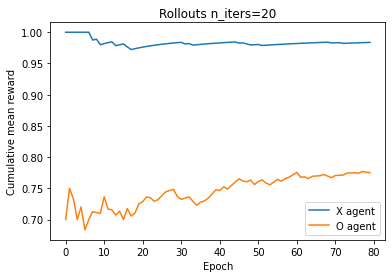

X mean reward last 10 epochs: 0.9831047376493048
O mean reward last 10 epochs: 0.7410158777210378


In [11]:
GAME_SIZE = 3

N_ITERS = 20
x_agent = RolloutAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 
                       N_ITERS, 'x')
o_agent = RolloutAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 
                       N_ITERS, 'o')

N_EPOCHS = 800

env = TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE)

x_agent, o_agent = train_rollouts_agents(env, x_agent, o_agent, N_ITERS,
                                         plot_rewards=True, n_epochs=N_EPOCHS)

### 4x4 field, rollouts

100%|██████████| 500/500 [23:52<00:00,  2.86s/it]


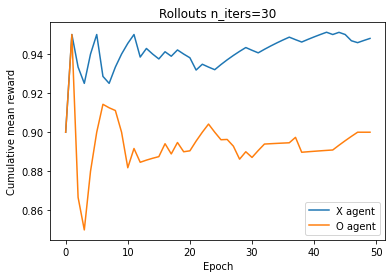

X mean reward last 10 epochs: 0.9389767970837678
O mean reward last 10 epochs: 0.89370288048417


In [12]:
GAME_SIZE = 4

N_ITERS = 30
x_agent = RolloutAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 
                       N_ITERS, 'x')
o_agent = RolloutAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 
                       N_ITERS, 'o')

N_EPOCHS = 500

env = TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE)

x_agent, o_agent = train_rollouts_agents(env, x_agent, o_agent, N_ITERS,
                                         plot_rewards=True, n_epochs=N_EPOCHS)

### 3x3 field, Monte Carlo Tree Search

100%|██████████| 40/40 [01:03<00:00,  1.58s/it]


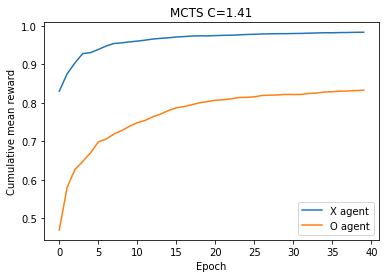

X mean reward last 10 epochs: 0.9558984216563868
O mean reward last 10 epochs: 0.7507865927654721


In [4]:
N_EPOCHS = 40
EXPLORATION_CONST = math.sqrt(2)
GAME_SIZE = 3

env = TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE)

x_agent = MCTSAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 'x', EXPLORATION_CONST)
o_agent = MCTSAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 'o', EXPLORATION_CONST)

x_agent, o_agent = train_mcts_agents(env, x_agent, o_agent, 
                                     EXPLORATION_CONST, plot_rewards=True,
                                     n_epochs=N_EPOCHS, n_episodes_train=1000,
                                     n_episodes_evaluate=100)

### 4x4 field, Monte Carlo Tree Search

100%|██████████| 500/500 [1:22:24<00:00,  9.89s/it]


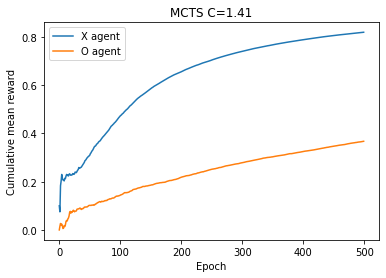

X mean reward last 10 epochs: 0.8299802820386435
O mean reward last 10 epochs: 0.3826094511402336


In [16]:
N_EPOCHS = 500
EXPLORATION_CONST = math.sqrt(2)
GAME_SIZE = 4

env = TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE)

x_agent = MCTSAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 'x', EXPLORATION_CONST)
o_agent = MCTSAgent(TicTacToe(GAME_SIZE, GAME_SIZE, GAME_SIZE), 'o', EXPLORATION_CONST)

x_agent, o_agent = train_mcts_agents(env, x_agent, o_agent, 
                                     EXPLORATION_CONST, plot_rewards=True,
                                     n_epochs=N_EPOCHS, n_episodes_train=1000,
                                     n_episodes_evaluate=100)

Rollouts and Monte Carlo Tree Search are more stable approaches than Q-learning and DQNs, their graphs are more smooth. At least on 3x3 field, rollouts and MCTS outperform other algorithms. Rollouts are fast and with great quality. On the other hand, MCTS is more computationally intensive and I think it didn't have enough time to converge on field 4x4, still the trend is rising which is promising.